In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=2b396936ca19b83453a34c6dcc439b970dfb913dc931017290fd025828af7954
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
! gdown --id 1WsCM6E1YE4nAGiqfnbSCP-cTY1FkrDyB

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1WsCM6E1YE4nAGiqfnbSCP-cTY1FkrDyB
From (redirected): https://drive.google.com/uc?id=1WsCM6E1YE4nAGiqfnbSCP-cTY1FkrDyB&confirm=t&uuid=512d54d5-49c8-4acc-8662-5f711b451a5d
To: /content/Crimes_-_2001_to_Present.csv
100% 1.88G/1.88G [00:20<00:00, 91.3MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year_Extracted'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Location Description'] = df['Location Description'].fillna('Unknown')

df = df.drop_duplicates()
df = df.drop(columns=['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'])
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,Year,Updated On,Year_Extracted,Month,Day,Hour
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,1.0,42.0,32.0,11,2015,08/01/2017 03:52:26 PM,2015,3,18,12
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,25.0,36.0,19.0,11,2018,04/06/2019 04:04:43 PM,2018,12,20,15
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,Unknown,False,False,...,8.0,15.0,63.0,11,2016,04/06/2019 04:04:43 PM,2016,5,1,0
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,17.0,33.0,14.0,08A,2018,04/06/2019 04:04:43 PM,2018,12,20,16
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,22.0,21.0,71.0,11,2014,04/06/2019 04:04:43 PM,2014,6,1,0


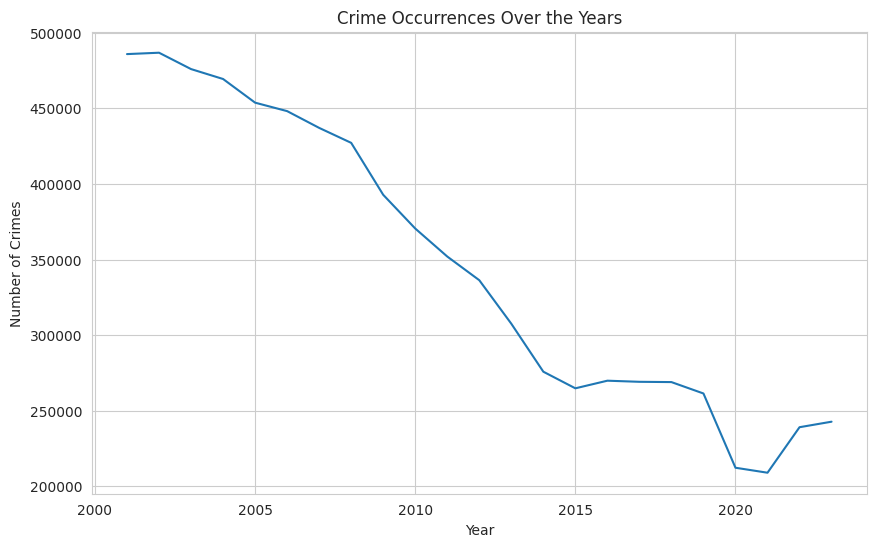

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Temporal Trends: Crimes over the Years
df['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Crime Occurrences Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

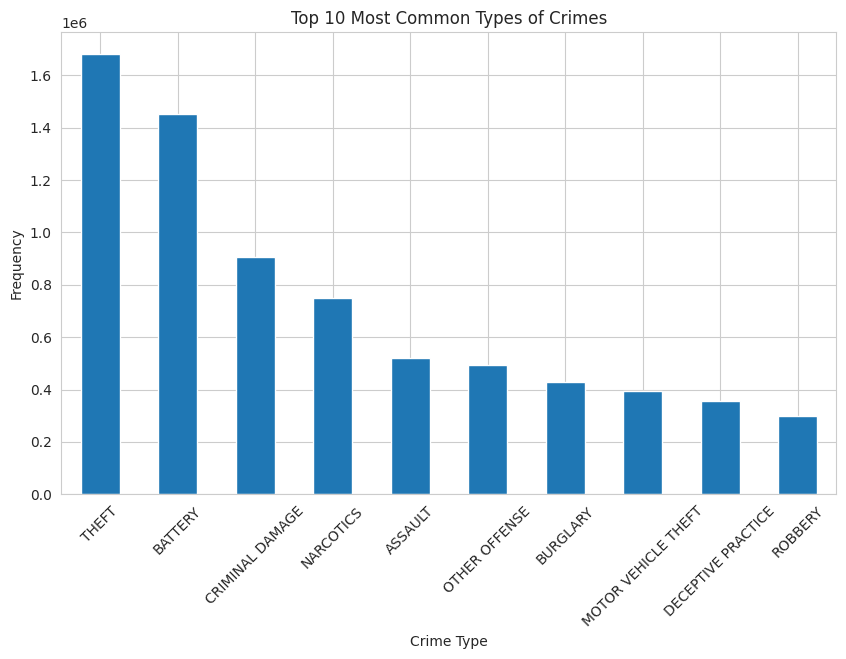

In [9]:
# 2. Crime Types and Frequencies
plt.figure(figsize=(10, 6))
df['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Types of Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

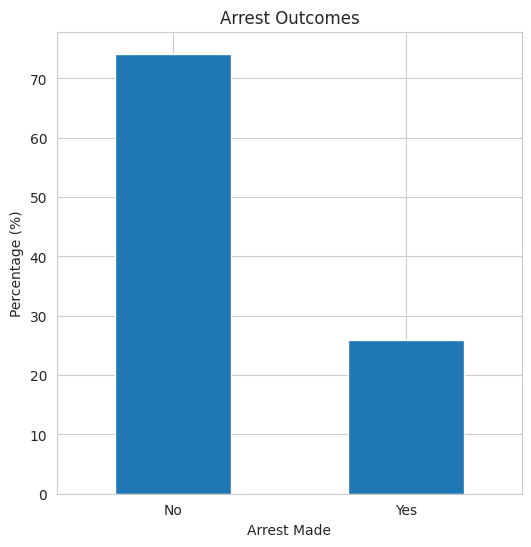

In [10]:
# 3. Arrest Outcomes
arrest_rates = df['Arrest'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
arrest_rates.plot(kind='bar')
plt.title('Arrest Outcomes')
plt.xlabel('Arrest Made')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

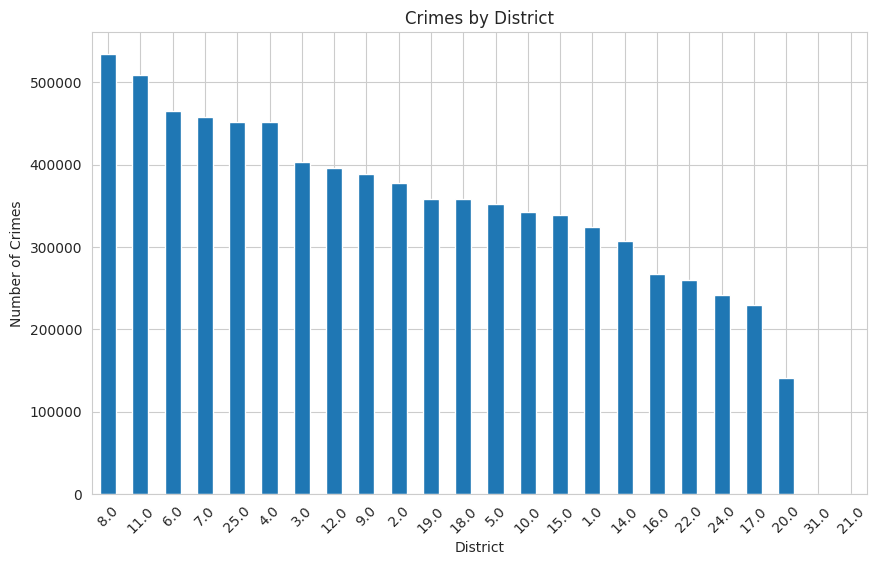

In [11]:
# 4. Spatial Distribution: Crimes by District
plt.figure(figsize=(10, 6))
df['District'].value_counts().plot(kind='bar')
plt.title('Crimes by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Law Enforcement Data Analysis") \
    .getOrCreate()


In [26]:
from pyspark.sql.functions import to_timestamp

df = spark.read.csv("Crimes_-_2001_to_Present.csv", header=True, inferSchema=True)
df = df.withColumn("Date", to_timestamp(df["Date"], "MM/dd/yyyy hh:mm:ss a"))
df.createOrReplaceTempView("crimes")


In [27]:
df.printSchema()
df.show(n=5)


root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)

+--------+-----------+-------------------+--------------------+----+------------------+------

In [28]:
spark.sql("""
    SELECT YEAR(Date) as Year, COUNT(*) as Total_Crimes
    FROM crimes
    GROUP BY YEAR(Date)
    ORDER BY YEAR(Date)
""").show()


+----+------------+
|Year|Total_Crimes|
+----+------------+
|2001|      485902|
|2002|      486811|
|2003|      475987|
|2004|      469428|
|2005|      453775|
|2006|      448179|
|2007|      437090|
|2008|      427189|
|2009|      392830|
|2010|      370521|
|2011|      351999|
|2012|      336329|
|2013|      307548|
|2014|      275805|
|2015|      264813|
|2016|      269854|
|2017|      269120|
|2018|      268933|
|2019|      261396|
|2020|      212274|
+----+------------+
only showing top 20 rows



In [29]:
spark.sql("""
    SELECT `Primary Type` as Primary_Type, COUNT(*) as Total
    FROM crimes
    GROUP BY `Primary Type`
    ORDER BY Total DESC
    LIMIT 10
""").show()


+-------------------+-------+
|       Primary_Type|  Total|
+-------------------+-------+
|              THEFT|1679935|
|            BATTERY|1452161|
|    CRIMINAL DAMAGE| 906944|
|          NARCOTICS| 750925|
|            ASSAULT| 522198|
|      OTHER OFFENSE| 493654|
|           BURGLARY| 429173|
|MOTOR VEHICLE THEFT| 393937|
| DECEPTIVE PRACTICE| 356350|
|            ROBBERY| 299968|
+-------------------+-------+



In [30]:
spark.sql("""
    SELECT `Location Description` as Location_Description, COUNT(*) as Total
    FROM crimes
    GROUP BY `Location Description`
    ORDER BY Total DESC
    LIMIT 10
""").show()


+--------------------+-------+
|Location_Description|  Total|
+--------------------+-------+
|              STREET|2077851|
|           RESIDENCE|1326505|
|           APARTMENT| 910498|
|            SIDEWALK| 738127|
|               OTHER| 270022|
|PARKING LOT/GARAG...| 202970|
|               ALLEY| 176980|
|  SMALL RETAIL STORE| 151879|
|SCHOOL, PUBLIC, B...| 146375|
|    RESIDENCE-GARAGE| 135531|
+--------------------+-------+



In [32]:
spark.sql("""
    SELECT HOUR(Date) as Hour, COUNT(*) as Total_Crimes
    FROM crimes
    GROUP BY HOUR(Date)
    ORDER BY HOUR(Date)
""").show(24)


+----+------------+
|Hour|Total_Crimes|
+----+------------+
|   0|      457065|
|   1|      252797|
|   2|      213322|
|   3|      172834|
|   4|      131619|
|   5|      110038|
|   6|      128042|
|   7|      182233|
|   8|      269184|
|   9|      343553|
|  10|      337210|
|  11|      352569|
|  12|      456324|
|  13|      377016|
|  14|      400380|
|  15|      423484|
|  16|      401931|
|  17|      408971|
|  18|      434669|
|  19|      447235|
|  20|      445431|
|  21|      431813|
|  22|      424738|
|  23|      354124|
+----+------------+



In [25]:
# Convert the Spark DataFrame to a Pandas DataFrame
annual_crime_counts_pd = annual_crime_counts.toPandas()

# Import NumPy
import numpy as np

# Calculate mean and standard deviation using NumPy
mean_crimes = np.mean(annual_crime_counts_pd['Total_Crimes'])
std_dev_crimes = np.std(annual_crime_counts_pd['Total_Crimes'])

print(f"Mean Annual Crimes: {mean_crimes}")
print(f"Standard Deviation of Annual Crimes: {std_dev_crimes}")


Mean Annual Crimes: 345938.347826087
Standard Deviation of Annual Crimes: 95086.96118570196


In [32]:
import numpy as np

# Example path to your CSV file
file_path = 'Crimes_-_2001_to_Present.csv'

# Assuming the first column is the year (for demonstration purposes)
# Note: You'll need to adjust this to match the structure of your actual dataset
data = np.genfromtxt(file_path, delimiter=',', skip_header=1, usecols=(0), dtype=int)
# Mean
mean_value = np.mean(data)
print(f"Mean: {mean_value}")

# Median
median_value = np.median(data)
print(f"Median: {median_value}")

# Standard Deviation
std_dev = np.std(data)
print(f"Standard Deviation: {std_dev}")
# Example numerical arrays
# In a real scenario, these might represent counts of two different types of crimes over the same time periods
crimes_type_1 = np.random.randint(0, 100, 10)  # Placeholder data
crimes_type_2 = np.random.randint(0, 100, 10)  # Placeholder data

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(crimes_type_1, crimes_type_2)[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")


Mean: 7158502.631107177
Median: 7157025.5
Standard Deviation: 3578169.920825543
Correlation Coefficient: 0.5502508807691218


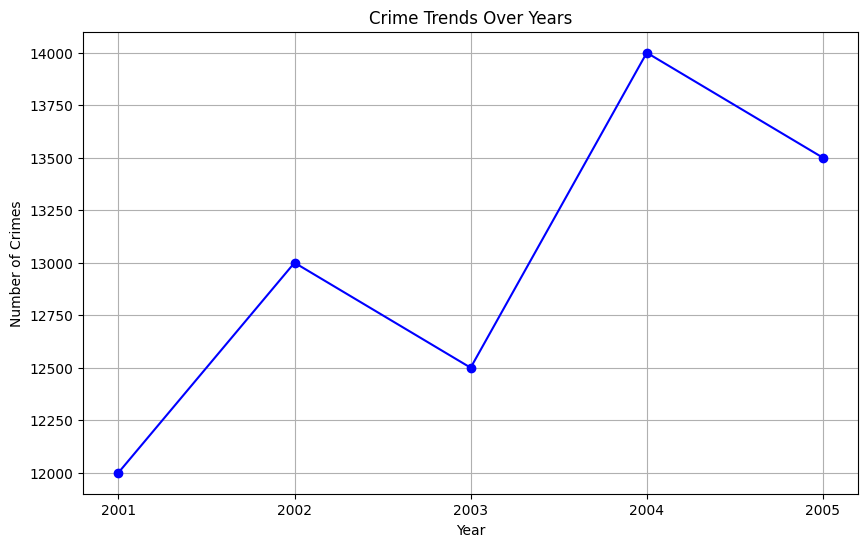

In [33]:
# Example NumPy arrays for demonstration
years = np.array([2001, 2002, 2003, 2004, 2005])  # Example years
crime_counts = np.array([12000, 13000, 12500, 14000, 13500])  # Example crime counts for those years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years, crime_counts, marker='o', linestyle='-', color='b')
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(years)  # Ensure all years are displayed
plt.show()


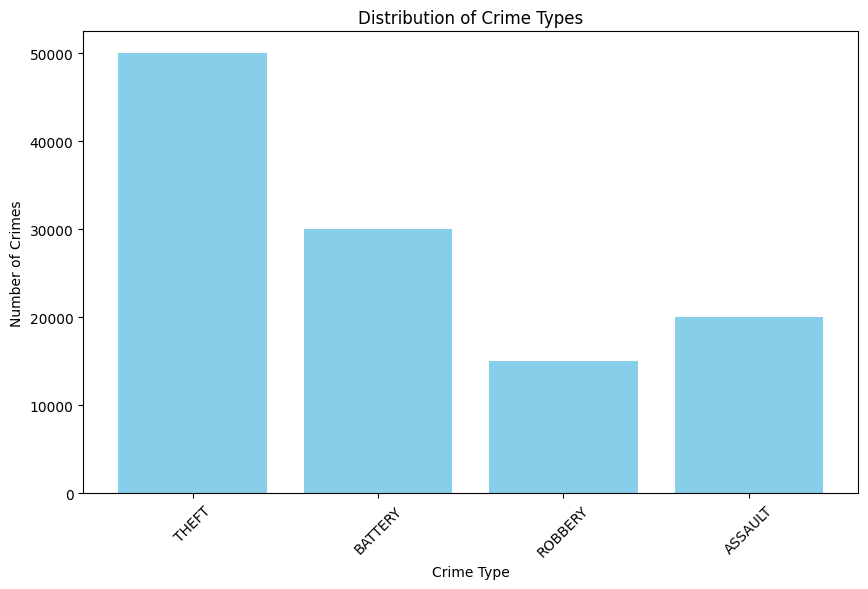

In [34]:
crime_types = np.array(['THEFT', 'BATTERY', 'ROBBERY', 'ASSAULT'])  # Example crime types
crime_type_counts = np.array([50000, 30000, 15000, 20000])  # Example counts for these crime types
plt.figure(figsize=(10, 6))
plt.bar(crime_types, crime_type_counts, color='skyblue')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()
